In [1]:
import pandas as pd
df = pd.read_csv("uber.csv")

In [2]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.isna()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [6]:
df.fillna(df['dropoff_longitude'].mean(),inplace = True)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f795e2e8dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f795e2e9300>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f795e2e8b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f795e2e9840>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f795e2e9ae0>],
 'means': []}

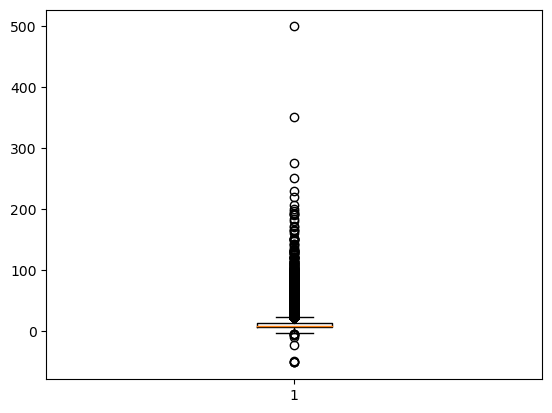

In [8]:

import matplotlib.pyplot as plt
plt.boxplot(df['fare_amount'])

In [23]:
from scipy import stats

z_scores = stats.zscore(df['fare_amount'])
threshold = 2  # Adjust as needed
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]

In [29]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['fare_amount'] < Q1 - 1.5 * IQR) | (df['fare_amount'] > Q3 + 1.5 * IQR)]
outlier_count = len(outliers)
print("Number of outliers:", outlier_count)

Number of outliers: 17167


In [30]:
df.corr()

/var/folders/pq/s_4hd0qj7qn28xjt_77_v5y40000gn/T/ipykernel_5524/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000245,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011113,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.845735,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.701877,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.916383,0.000033
dropoff_latitude,0.000245,-0.011113,-0.845735,0.701877,-0.916383,1.000000,-0.000558
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000558,1.000000


/var/folders/pq/s_4hd0qj7qn28xjt_77_v5y40000gn/T/ipykernel_5524/3098897228.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

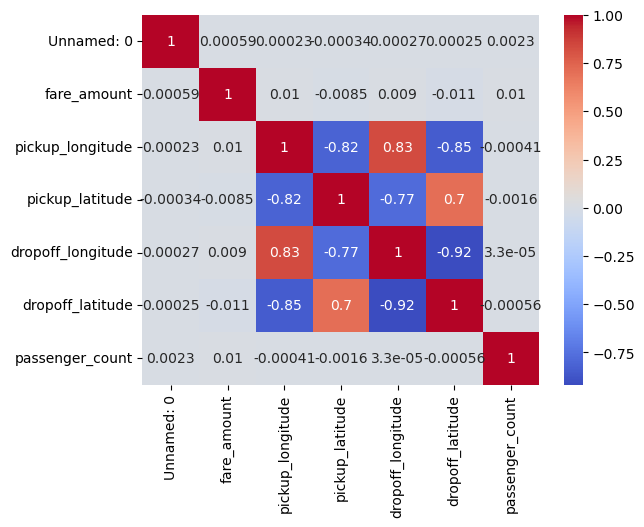

In [31]:
import seaborn as sns
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
dropcol=['fare_amount','key','pickup_datetime']
X = df.drop(columns=dropcol,axis=1)
y = df['fare_amount']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [36]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
linear_reg_predictions = linear_reg_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [38]:
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

In [39]:
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)

In [40]:
print("Linear Regression R2:", linear_reg_r2)
print("Random Forest R2:", random_forest_r2)

print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest RMSE:", random_forest_rmse)

Linear Regression R2: 0.0003235402364187845
Random Forest R2: 0.6878722038184368
Linear Regression RMSE: 10.309540088119522
Random Forest RMSE: 5.7607069356005045
